C:\Users\arlio\AppData\Local\Temp\ipykernel_22100\1507362041.py:61: UserWarning: Glyph 23485 (\N{CJK UNIFIED IDEOGRAPH-5BBD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\arlio\AppData\Local\Temp\ipykernel_22100\1507362041.py:61: UserWarning: Glyph 34920 (\N{CJK UNIFIED IDEOGRAPH-8868}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\arlio\AppData\Local\Temp\ipykernel_22100\1507362041.py:61: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\arlio\AppData\Local\Temp\ipykernel_22100\1507362041.py:61: UserWarning: Glyph 26500 (\N{CJK UNIFIED IDEOGRAPH-6784}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\arlio\AppData\Local\Temp\ipykernel_22100\1507362041.py:61: UserWarning: Glyph 36716 (\N{CJK UNIFIED IDEOGRAPH-8F6C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\arlio\AppData\Local\Temp\ipykernel_22100\1507362041.py:61: UserWarning: Glyph 25442 (\N{CJK UNIFIED IDEOGRAPH-6362})

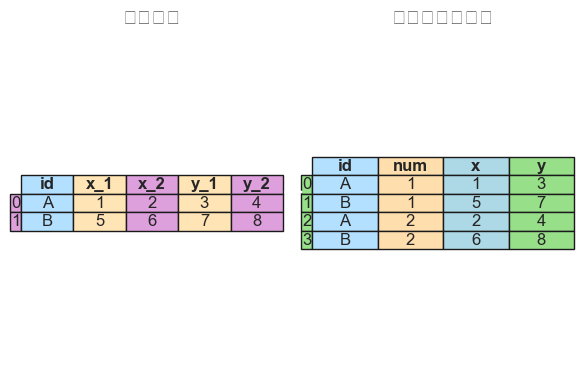

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# 设置字体和样式
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set(style="whitegrid")

# 构造原始 DataFrame
df = pd.DataFrame({
    "id": ["A", "B"],
    "x_1": [1, 5],
    "x_2": [2, 6],
    "y_1": [3, 7],
    "y_2": [4, 8]
})

# 执行 wide → long 的转换
df_long = pd.wide_to_long(df, stubnames=["x", "y"], i="id", j="num", sep="_").reset_index()

# 可视化函数
def plot_table(df, ax, loc='left', title=''):
    ax.axis('off')
    table = pd.plotting.table(ax, df, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    
    # 颜色高亮（简单按列名设定颜色）
    col_colors = {
        'id': '#b3e0ff', 'x': '#add8e6', 'x_1': '#ffe4b5', 'x_2': '#dda0dd',
        'y': '#98df8a', 'y_1': '#ffe4b5', 'y_2': '#dda0dd', 'num': '#ffdead'
    }

    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold')
        if col < len(df.columns):
            colname = df.columns[col]
            color = col_colors.get(colname, 'white')
            cell.set_facecolor(color)
        else:
            cell.set_facecolor('white')

    ax.set_title(title, fontsize=14, weight='bold')

# 创建子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))
plot_table(df, ax1, title="宽表结构")
plot_table(df_long, ax2, title="转换后长表结构")

# 添加箭头
arrow = FancyArrowPatch((0.52, 0.5), (0.48, 0.5),
                        transform=fig.transFigure,
                        connectionstyle="arc3,rad=0",
                        arrowstyle='-|>', linewidth=2)
fig.patches.append(arrow)

plt.tight_layout()
plt.show()


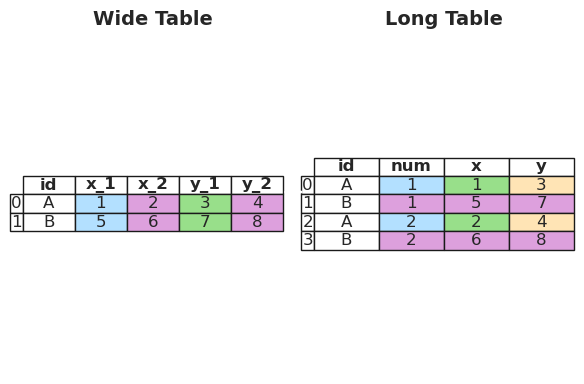

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import matplotlib
import warnings

# 设置支持中英文的字体，避免中文 warning
matplotlib.rcParams['font.family'] = ['DejaVu Sans', 'Microsoft YaHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 忽略所有 warning 信息
warnings.filterwarnings("ignore")

# 构造宽表数据
df = pd.DataFrame({
    "id": ["A", "B"],
    "x_1": [1, 5],
    "x_2": [2, 6],
    "y_1": [3, 7],
    "y_2": [4, 8]
})

# 宽表转换为长表
df_long = pd.wide_to_long(
    df,
    stubnames=["x", "y"],
    i="id",
    j="num",
    sep="_"
).reset_index()

# 自定义每个单元格颜色（确保颜色一一对应）
cell_colors_wide = {
    (0, 1): '#b3e0ff',  # x_1 A
    (1, 1): '#b3e0ff',  # x_1 B
    (0, 2): '#dda0dd',  # x_2 A
    (1, 2): '#dda0dd',  # x_2 B
    (0, 3): '#98df8a',  # y_1 A
    (1, 3): '#98df8a',  # y_1 B
    (0, 4): '#dda0dd',  # y_2 A
    (1, 4): '#dda0dd'   # y_2 B
}

cell_colors_long = {
    (0, 1): '#b3e0ff',  # x A1
    (0, 2): '#98df8a',  # y A1
    (0, 3): '#ffe4b5',  # num 1
    (1, 1): '#dda0dd',  # x A2
    (1, 2): '#dda0dd',  # y A2
    (1, 3): '#dda0dd',  # num 2
    (2, 1): '#b3e0ff',  # x B1
    (2, 2): '#98df8a',  # y B1
    (2, 3): '#ffe4b5',  # num 1
    (3, 1): '#dda0dd',  # x B2
    (3, 2): '#dda0dd',  # y B2
    (3, 3): '#dda0dd'   # num 2
}

# 绘制 DataFrame 表格的函数
def plot_table(df, ax, title='', cell_colors=None):
    ax.axis('off')  # 隐藏坐标轴
    table = pd.plotting.table(
        ax,
        df,
        loc='center',
        cellLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(12)

    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold')  # 表头加粗
            cell.set_facecolor('#ffffff')
        else:
            key = (row - 1, col)
            if cell_colors and key in cell_colors:
                cell.set_facecolor(cell_colors[key])
            else:
                cell.set_facecolor('#ffffff')

    ax.set_title(title, fontsize=14, weight='bold')


# 创建图像区域
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))

# 左侧：宽表
plot_table(df, ax1, title="Wide Table", cell_colors=cell_colors_wide)

# 右侧：长表
plot_table(df_long, ax2, title="Long Table", cell_colors=cell_colors_long)

# 添加箭头表示转换
arrow = FancyArrowPatch(
    (0.52, 0.5), (0.48, 0.5),
    transform=fig.transFigure,
    connectionstyle="arc3,rad=0",
    arrowstyle='-|>',
    linewidth=2
)
fig.patches.append(arrow)

# 自动调整布局
plt.tight_layout()
import os
os.makedirs("D:/fig", exist_ok=True)
plt.savefig("D:/fig/TwoTables.png", dpi=1200, bbox_inches='tight')

plt.show()

